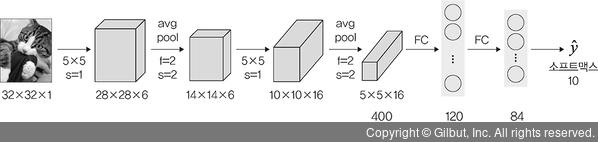
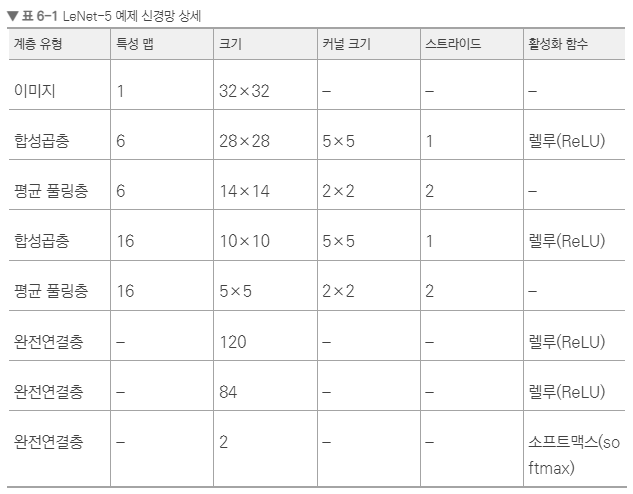

In [1]:
# 코드 6-1 필요한 라이브러리 호출
"""
필요한 라이브러리를 호출하는 코드입니다.
라이브러리:
    %load_ext tensorboard: TensorBoard 확장을 로드합니다.
    numpy as np: 수치 계산을 위한 라이브러리입니다.
    tensorflow as tf: 딥러닝 프레임워크입니다.
    matplotlib.pyplot as plt: 데이터 시각화를 위한 라이브러리입니다.
    tensorflow.keras:
        Model: Keras의 모델 클래스입니다.
        Sequential: 순차 모델을 생성하는 클래스입니다.
        to_categorical: 범주형 데이터를 원-핫 인코딩하는 함수입니다.
        categorical_crossentropy: 범주형 교차 엔트로피 손실 함수입니다.
        ImageDataGenerator: 이미지 데이터 증강을 위한 클래스입니다.
        layers:
            Dense: 완전 연결 레이어 (밀집 레이어)입니다.
            Flatten: 입력을 평탄화하는 레이어입니다.
            Conv2D: 2D 합성곱 레이어입니다.
            AveragePooling2D: 평균 풀링 레이어입니다.
            Dropout: 드롭아웃 레이어입니다.
"""
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout

2024-12-03 01:22:05.884589: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:22:05.887260: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:22:05.894362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733156525.913713   91526 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733156525.916584   91526 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 01:22:05.930477: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# 코드 6-2 LeNet-5 클래스 생성
num_classes = 2


class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(
            Conv2D(
                6,
                kernel_size=(5, 5),
                strides=(1, 1),
                activation="relu",
                input_shape=input_shape,
                padding="same",
            )
        )
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
        self.add(
            Conv2D(
                16,
                kernel_size=(5, 5),
                strides=(1, 1),
                activation="relu",
                padding="valid",
            )
        )
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
        self.add(Flatten())
        self.add(Dense(120, activation="relu"))
        self.add(Dense(84, activation="relu"))
        self.add(Dense(nb_classes, activation="softmax"))

        self.compile(
            optimizer="adam", loss=categorical_crossentropy, metrics=["accuracy"]
        )

In [3]:
# 코드 6-3 LeNet-5 모델 생성
model = LeNet((100, 100, 3), num_classes)
model.summary()

/home/halozhan/Study/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1733156534.266397   91526 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "le_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 50, 50, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 23, 23, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8464)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,015,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,029,006 (3.93 MB)

 Trainable params: 1,029,006 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 코드 6-4 파라미터 초기화 및 데이터 호출
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "../chap6/data/catanddog/train/"
valid_dir = "../chap6/data/catanddog/validation/"

In [5]:
# 코드 6-5 이미지 데이터 증가
train = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)
train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode="categorical",
)

valid = ImageDataGenerator(rescale=1.0 / 255)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode="categorical",
)

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [7]:
# 코드 6-6 텐서보드에서 모델 훈련 과정 살펴보기
"""
모델 훈련 과정을 텐서보드에서 시각화하기 위한 코드입니다.
log_dir: 텐서보드 로그 파일이 저장될 디렉토리 경로입니다.
tensorboard_callback: 텐서보드 콜백 객체로, 모델 훈련 중 로그를 기록합니다.
    - log_dir: 로그 파일이 저장될 디렉토리 경로입니다.
    - histogram_freq: 히스토그램 계산 빈도로, 1로 설정하면 매 에포크마다 계산합니다.
    - profile_batch: 프로파일링할 배치 수로, 0으로 설정하면 프로파일링을 비활성화합니다.
model.fit: 모델을 훈련시키는 함수입니다.
    - train_generator: 훈련 데이터 생성기입니다.
    - epochs: 훈련할 에포크 수입니다.
    - steps_per_epoch: 한 에포크당 훈련 단계 수로, 훈련 데이터 수를 배치 크기로 나눈 값입니다.
    - validation_data: 검증 데이터 생성기입니다.
    - validation_steps: 한 에포크당 검증 단계 수로, 검증 데이터 수를 배치 크기로 나눈 값입니다.
    - callbacks: 훈련 중 호출할 콜백 리스트로, 여기서는 텐서보드 콜백을 사용합니다.
    - verbose: 훈련 과정의 출력 모드로, 1로 설정하면 진행 상황을 출력합니다.
"""
import os


log_dir = "../chap6/img/log6-1/"

# 경로가 디렉토리인지 확인
if os.path.exists(log_dir) and not os.path.isdir(log_dir):
    os.remove(log_dir)

# 디렉토리 생성
os.makedirs(log_dir, exist_ok=True)

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1, profile_batch=0
)

model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_num // BATCH_SIZE,
    validation_data=valid_generator,
    validation_steps=valid_num // BATCH_SIZE,
    callbacks=[tensorboard_callback],
    verbose=1,
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7349 - loss: 0.5036 - val_accuracy: 0.6042 - val_loss: 0.8353
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6562 - loss: 0.6317 - val_accuracy: 0.6146 - val_loss: 0.7617
Epoch 3/100


/home/halozhan/Study/.venv/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7341 - loss: 0.5434 - val_accuracy: 0.6458 - val_loss: 0.7272
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7500 - loss: 0.5280 - val_accuracy: 0.6771 - val_loss: 0.7195
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7495 - loss: 0.5211 - val_accuracy: 0.5729 - val_loss: 0.7518
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7500 - loss: 0.4454 - val_accuracy: 0.5938 - val_loss: 0.7592
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7777 - loss: 0.4863 - val_accuracy: 0.5312 - val_loss: 0.8536
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5938 - loss: 0.5728 - val_accuracy: 0.5729 - val_loss: 0.8406
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7845 - loss: 0.4718 - val_accuracy: 0.7083 - val_loss: 0.7269
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6562 - loss: 0.7317 - val_accuracy: 0.6562 - val_

tensorboard --logdir=/home/halozhan/Study/chap6/img/log6-1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


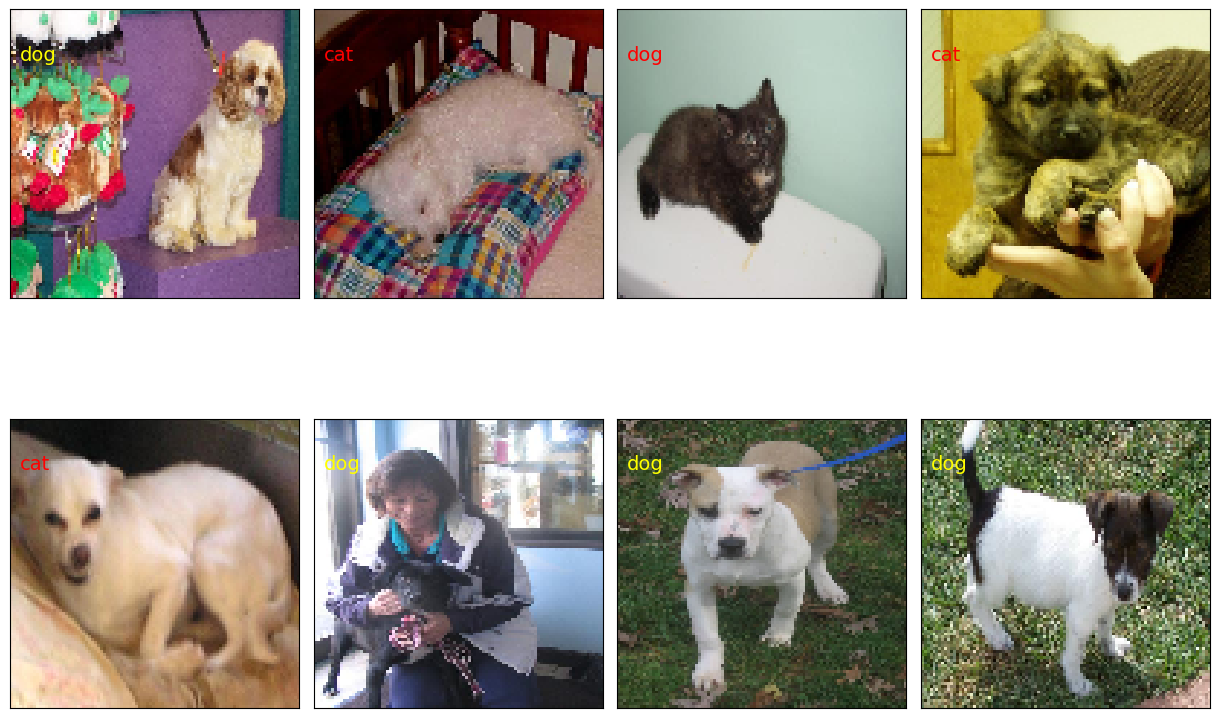

In [8]:
# 코드 6-7 이미지 데이터셋 분류에 대한 예측
class_names = ["cat", "dog"]
validation, label_batch =next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i, :], cmap=plt.cm.gray_r, interpolation="nearest")

    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color="yellow", fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color="red", fontsize=14)